In [9]:
import pandas as pd
from geopy.distance import geodesic
import random
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt


In [11]:
puntuacion_zonas_verdes = pd.read_csv('Puntuacion_Zonas_Verdes.csv')
resultados_menores3 = pd.read_csv('resultados_menores3.csv')
competition_points = pd.read_csv('competitionpoints.csv')

puntos_analisis = pd.read_excel('puntos_análisis_con_puntuacion_transporte_público.xlsx')
average_rent_results_new = pd.read_excel('average_rent_results_with_scores_decimal.xlsx')

In [13]:
def standardize_geometry(df):
    df['geometry'] = df['geometry'].apply(lambda x: f"POINT ({round(float(x.split()[1].strip('()')), 6)} {round(float(x.split()[2].strip('()')), 6)})")
    return df

puntos_analisis = standardize_geometry(puntos_analisis)
puntuacion_zonas_verdes = standardize_geometry(puntuacion_zonas_verdes)
resultados_menores3 = standardize_geometry(resultados_menores3)
average_rent_results_new = standardize_geometry(average_rent_results_new)
competition_points = standardize_geometry(competition_points)

merged_df_new = puntos_analisis.merge(puntuacion_zonas_verdes, on='geometry', how='outer')
merged_df_new = merged_df_new.merge(resultados_menores3, on='geometry', how='outer')
merged_df_new = merged_df_new.merge(average_rent_results_new, on='geometry', how='outer')
merged_df_new = merged_df_new.merge(competition_points, on='geometry', how='outer')

merged_df_new = merged_df_new[['geometry', 'score', 'puntuacion_x', 'puntuacion_y', 'competencia_score', 'menores3_score']]

merged_df_new

,geometry,score,puntuacion_x,puntuacion_y,competencia_score,menores3_score
0,POINT (2.063315 41.421029),10.000000,0.000000,0.000000,20.000000,0.04
1,POINT (2.063315 41.430483),10.000000,0.000000,0.000000,20.000000,0.04
2,POINT (2.074297 41.411575),10.000000,0.000000,0.000000,20.000000,0.04
3,POINT (2.074297 41.430483),10.000000,0.000000,0.000000,20.000000,0.04
4,POINT (2.085279 41.411575),10.000000,0.000000,0.000000,20.000000,0.04
...,...,...,...,...,...,...
99,POINT (2.206081 41.411575),8.653333,7.843137,1.428571,16.666667,17.25
100,POINT (2.206081 41.421029),6.160000,6.470588,0.714286,13.333333,18.78
101,POINT (2.206081 41.430483),0.773333,3.725490,0.000000,18.333333,4.29
102,POINT (2.206081 41.439937),5.000000,4.607843,0.000000,18.333333,5.65


In [15]:

merged_df_new = merged_df_new.rename(columns={
    'score': 'score_rent',
    'puntuacion_x': 'score_public_transport',
    'puntuacion_y': 'score_green_zones',
    'competencia_score': 'score_competitors',
    'menores3_score': 'score_under_3'
})

merged_df_new

,geometry,score_rent,score_public_transport,score_green_zones,score_competitors,score_under_3
0,POINT (2.063315 41.421029),10.000000,0.000000,0.000000,20.000000,0.04
1,POINT (2.063315 41.430483),10.000000,0.000000,0.000000,20.000000,0.04
2,POINT (2.074297 41.411575),10.000000,0.000000,0.000000,20.000000,0.04
3,POINT (2.074297 41.430483),10.000000,0.000000,0.000000,20.000000,0.04
4,POINT (2.085279 41.411575),10.000000,0.000000,0.000000,20.000000,0.04
...,...,...,...,...,...,...
99,POINT (2.206081 41.411575),8.653333,7.843137,1.428571,16.666667,17.25
100,POINT (2.206081 41.421029),6.160000,6.470588,0.714286,13.333333,18.78
101,POINT (2.206081 41.430483),0.773333,3.725490,0.000000,18.333333,4.29
102,POINT (2.206081 41.439937),5.000000,4.607843,0.000000,18.333333,5.65


In [17]:
if merged_df_new['score_rent'].dtype == 'object':
    merged_df_new['score_rent'] = pd.to_numeric(merged_df_new['score_rent'], errors='coerce')

# Añadir una columna con la suma de los diferentes puntajes
merged_df_new['total_score'] = merged_df_new[['score_rent', 'score_public_transport', 'score_green_zones', 'score_competitors', 'score_under_3']].sum(axis=1)

merged_df_new.to_excel('resultadosmergeddfnew.xlsx')

merged_df_new

,geometry,score_rent,score_public_transport,score_green_zones,score_competitors,score_under_3,total_score
0,POINT (2.063315 41.421029),10.000000,0.000000,0.000000,20.000000,0.04,30.040000
1,POINT (2.063315 41.430483),10.000000,0.000000,0.000000,20.000000,0.04,30.040000
2,POINT (2.074297 41.411575),10.000000,0.000000,0.000000,20.000000,0.04,30.040000
3,POINT (2.074297 41.430483),10.000000,0.000000,0.000000,20.000000,0.04,30.040000
4,POINT (2.085279 41.411575),10.000000,0.000000,0.000000,20.000000,0.04,30.040000
...,...,...,...,...,...,...,...
99,POINT (2.206081 41.411575),8.653333,7.843137,1.428571,16.666667,17.25,51.841709
100,POINT (2.206081 41.421029),6.160000,6.470588,0.714286,13.333333,18.78,45.458207
101,POINT (2.206081 41.430483),0.773333,3.725490,0.000000,18.333333,4.29,27.122157
102,POINT (2.206081 41.439937),5.000000,4.607843,0.000000,18.333333,5.65,33.591176


In [48]:
median_total_score = merged_df_new['total_score'].median()
average_total_score = merged_df_new['total_score'].mean

median_total_score

44.55168067226891

In [54]:
merged_df_new['total_score'].mean()

45.18419683257919

Text(0.5, 0, 'Total Score')

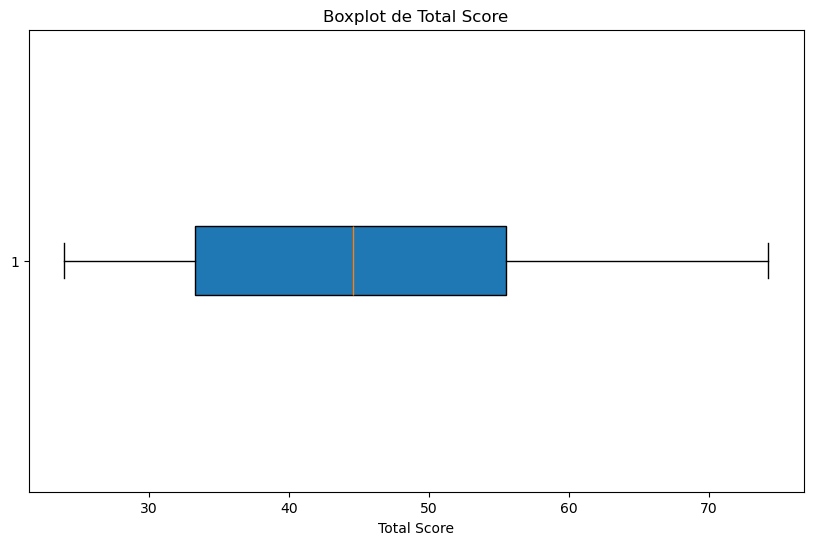

In [44]:
# Crear el boxplot para la columna 'total_score'
plt.figure(figsize=(10, 6))
plt.boxplot(merged_df_new['total_score'], vert=False, patch_artist=True)
plt.title('Boxplot de Total Score')
plt.xlabel('Total Score')

In [62]:
df = merged_df_new
df['longitude'] = df['geometry'].apply(lambda x: float(x.split()[1][1:]))
df['latitude'] = df['geometry'].apply(lambda x: float(x.split()[2][:-1]))
max_score_row = df.loc[df['total_score'].idxmax()]
max_score_row

geometry                  POINT (2.140189 41.402122)
score_rent                                 18.266667
score_public_transport                     11.176471
score_green_zones                                5.0
score_competitors                               15.0
score_under_3                                  24.83
total_score                                74.273137
longitude                                   2.140189
latitude                                   41.402122
distance                                 1733.243991
Name: 40, dtype: object

In [64]:
map_center = [max_score_row['latitude'], max_score_row['longitude']]
m = folium.Map(location=map_center, zoom_start=15)

# Añadir un marcador para el punto con la puntuación más alta
folium.Marker(
    location=map_center,
    popup=f"Total Score: {max_score_row['total_score']}",
    icon=folium.Icon(color='red')
).add_to(m)

# Mostrar el mapa
m.save('puntoconrentamasalta.html')
m

In [19]:
#el objetivo de este analisis es ver si las guarderias que tenemos tienen en su mayoria (mas de 50%) una nota aprobatoria, esto sirve para validad los resultados

guarderias_df = pd.read_csv('guarderiasfinal.csv')

guarderias_df = guarderias_df.rename(columns={'Latitud': 'latitude', 'Longitud': 'longitude'})

merged_df_new[['longitude', 'latitude']] = merged_df_new['geometry'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').astype(float)

#Lo que hacemos es ver cual es el punto de los 104 puntos mas cercanos a la guarderia, y le asignamos ese puntaje
# Función para encontrar el punto más cercano y sus puntajes
def find_closest_scores(row, merged_df):
    guarderia_coords = (row['latitude'], row['longitude'])
    merged_df['distance'] = merged_df.apply(lambda x: geodesic(guarderia_coords, (x['latitude'], x['longitude'])).meters, axis=1)
    closest_point = merged_df.loc[merged_df['distance'].idxmin()]
    return pd.Series({
        'score_rent': closest_point['score_rent'],
        'score_public_transport': closest_point['score_public_transport'],
        'score_green_zones': closest_point['score_green_zones'],
        'score_competitors': closest_point['score_competitors'],
        'score_under_3': closest_point['score_under_3'],
        'total_score': closest_point['total_score']
    })

guarderias_df[['score_rent', 'score_public_transport', 'score_green_zones', 'score_competitors', 'score_under_3', 'total_score']] = guarderias_df.apply(find_closest_scores, axis=1, merged_df=merged_df_new)

guarderias_df

,Unnamed: 0,Nom_Barri,Nom_Districte,latitude,longitude,Nom_Local,score_rent,score_public_transport,score_green_zones,score_competitors,score_under_3,total_score
0,3,Sant Andreu,Sant Andreu,41.432409,2.186953,CENTRE INFANTIL LES MANETES,10.573333,6.372549,2.142857,0.000000,19.30,38.388739
1,30,el Congrés i els Indians,Sant Andreu,41.424225,2.178135,LLAR D'INFANTS DONALD,12.506667,9.901961,2.142857,11.666667,19.24,55.458151
2,204,Sant Martí de Provençals,Sant Martí,41.420181,2.199263,COL.LEGI SANT RAFAEL EDUCACIO INFANTIL,8.080000,6.470588,0.714286,10.000000,13.42,38.684874
3,306,Sant Andreu,Sant Andreu,41.438428,2.186946,LLAR D'INFANTS SPLAIT,6.733333,7.843137,3.571429,11.666667,20.58,50.394566
4,338,la Vila Olímpica del Poblenou,Sant Martí,41.394508,2.196265,ESCOLA BRESSOL COBI,14.813333,7.450980,5.000000,18.333333,8.75,54.347647
...,...,...,...,...,...,...,...,...,...,...,...,...
192,65483,el Poblenou,Sant Martí,41.400815,2.206951,ESCOLA BRESSOL EL XALET DE LA PAPERERA,13.653333,7.450980,6.428571,6.666667,17.03,51.229552
193,65986,el Fort Pienc,Eixample,41.395449,2.182264,ESCOLA BRESSOL EL TREN DE FORT PIENC,13.840000,9.803922,3.571429,15.000000,16.52,58.735350
194,66066,Montbau,Horta-Guinardó,41.435876,2.144037,ESCOLA BRESSOL L'ARBOÇ,10.386667,0.098039,0.714286,18.333333,0.22,29.752325
195,66078,la Trinitat Vella,Sant Andreu,41.450742,2.193240,ESCOLA BRESSOL EL TREN,1.160000,6.568627,1.428571,16.666667,10.69,36.513866


In [20]:
# Tomar el 80% de las filas de forma aleatoria
random.seed(42)
sample_df = guarderias_df.sample(frac=0.8, random_state=42)

total_rows = sample_df.shape[0]
greater_than_50_sample = sample_df[sample_df['total_score'] > 50].shape[0]
less_than_50_sample = sample_df[sample_df['total_score'] < 50].shape[0]

percentage_greater_than_50 = (greater_than_50_sample / total_rows) * 100
percentage_less_than_50 = (less_than_50_sample / total_rows) * 100

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Numerador': [greater_than_50_sample, less_than_50_sample],
    'Denominador': [total_rows, total_rows],
    'Resultado': [percentage_greater_than_50, percentage_less_than_50]
}, index=['>50', '<50'])

results_df

,Numerador,Denominador,Resultado
>50,102,158,64.556962
<50,56,158,35.443038


In [21]:
#Ahi arriba queda demostrado que la mayoria de las guarderias tienen una puntuacion aprobatoria, despues de tomar un random sample de 80%

In [25]:
#Ahora comprobamos que esto pase en el 20% restante de las filas

remaining_df = guarderias_df.drop(sample_df.index)

# Calcular el porcentaje de puntajes mayores a 50 y menores a 50 para el 20% restante
total_rows_remaining = remaining_df.shape[0]
greater_than_50_remaining = remaining_df[remaining_df['total_score'] > 50].shape[0]
less_than_50_remaining = remaining_df[remaining_df['total_score'] < 50].shape[0]

percentage_greater_than_50_remaining = (greater_than_50_remaining / total_rows_remaining) * 100
percentage_less_than_50_remaining = (less_than_50_remaining / total_rows_remaining) * 100

results_df = pd.DataFrame({
    'Numerador': [ greater_than_50_remaining, less_than_50_remaining],
    'Denominador': [ total_rows_remaining, total_rows_remaining],
    'Resultado': [ percentage_greater_than_50_remaining, percentage_less_than_50_remaining]
}, index=['>50 Remaining', '<50 Remaining'])

results_df

,Numerador,Denominador,Resultado
>50 Remaining,31,39,79.487179
<50 Remaining,8,39,20.512821


In [31]:
# la idea de este dataframe es explicar un poco los resultados, porque sant andreu reprubea tanto, pues porque las puntucuaiones reprueban en general en green_zones, competitors tambien mucha competencia 

In [33]:
districts_df = pd.read_csv('BarcelonaCiutat_Districtes.csv')

merged_gdf = gpd.GeoDataFrame(
    merged_df_new, geometry=gpd.points_from_xy(merged_df_new.longitude, merged_df_new.latitude))

districts_gdf = gpd.GeoDataFrame(
    districts_df, geometry=gpd.GeoSeries.from_wkt(districts_df['geometria_wgs84']))

merged_gdf = merged_gdf.set_crs("EPSG:4326")
districts_gdf = districts_gdf.set_crs("EPSG:4326")

points_with_districts = gpd.sjoin(merged_gdf, districts_gdf, how='left', op='within')

district_stats = points_with_districts.groupby('nom_districte').agg(
    num_puntos=('geometry', 'size'),
    min_score=('total_score', 'min'),
    max_score=('total_score', 'max'),
    promedio_score=('total_score', 'mean'),
    mediana_score=('total_score', 'median'),
    promedio_score_rent=('score_rent', 'mean'),
    promedio_score_public_transport=('score_public_transport', 'mean'),
    promedio_score_green_zones=('score_green_zones', 'mean'),
    promedio_score_competitors=('score_competitors', 'mean'),
    promedio_score_under_3=('score_under_3', 'mean')
).reset_index()


district_stats

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,nom_districte,num_puntos,min_score,max_score,promedio_score,mediana_score,promedio_score_rent,promedio_score_public_transport,promedio_score_green_zones,promedio_score_competitors,promedio_score_under_3
0,Ciutat Vella,3,37.768908,53.447843,44.065089,40.978515,6.475556,7.483660,3.571429,16.111111,10.423333
1,Eixample,7,60.515798,72.206359,66.488363,66.811232,14.864762,11.316527,7.448980,13.809524,19.048571
2,Gràcia,4,60.370784,69.863165,63.983151,62.849328,14.810000,9.485294,3.392857,13.750000,22.545000
3,Horta-Guinardó,12,29.752325,56.329580,45.280201,47.346681,10.495556,6.732026,2.797619,15.416667,9.838333
4,Les Corts,4,45.413866,57.322689,50.689664,50.011050,17.450000,6.004902,3.571429,17.083333,6.580000
5,Nou Barris,9,24.533137,57.787479,41.949683,38.084874,3.288889,7.777778,1.984127,15.000000,13.898889
6,Sant Andreu,7,27.122157,49.288768,39.785898,38.388739,7.445714,6.344538,1.734694,11.666667,12.594286
7,Sant Martí,11,38.684874,58.735350,48.878314,51.229552,11.277576,7.344029,2.987013,12.424242,14.845455
8,Sants-Montjuïc,25,23.913333,64.152381,35.582234,27.681569,5.592000,4.023529,2.428571,17.333333,6.204800
9,Sarrià-Sant Gervasi,22,30.040000,74.273137,46.191966,42.819552,15.593939,4.286988,2.370130,18.636364,5.304545


In [27]:
#queda confirmado, en el 20% restante hay nota aprobatoria por tanto el algoritmo es eficaz en asignar puntuaciones

In [35]:
#eso de arriba lo pueden copiar y pegar en excel para ver estadisticas etc

In [37]:
merged_gdf = gpd.GeoDataFrame(
    merged_df_new, geometry=gpd.points_from_xy(merged_df_new.longitude, merged_df_new.latitude))

max_score = merged_gdf['total_score'].max()
min_score = merged_gdf['total_score'].min()
colormap = folium.LinearColormap(colors=['red', 'yellow', 'green'], vmin=min_score, vmax=max_score)

map_center = [merged_gdf.geometry.y.mean(), merged_gdf.geometry.x.mean()]
m = folium.Map(location=map_center, zoom_start=12)

for idx, row in merged_gdf.iterrows():
    total_score = row['total_score']
    color = colormap(total_score)
    
    # Añadir un círculo alrededor del punto
    folium.Circle(
        location=[row.geometry.y, row.geometry.x],
        radius=750,  # Radio de 750 m
        color=None,
        fill=True,
        fill_color=color,
        fill_opacity=0.2,
        popup=f'Total Score: {total_score}',
        opacity=0
    ).add_to(m)
    
    # Añadir el marcador del punto
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=4,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=1,
        popup=f'Total Score: {total_score}'
    ).add_to(m)

colormap.add_to(m)

m.save('map_with_total_score.html')

heat_data = [[row.geometry.y, row.geometry.x, row['total_score']] for idx, row in merged_gdf.iterrows()]
m_heat = folium.Map(location=map_center, zoom_start=12)
HeatMap(heat_data).add_to(m_heat)

m_heat.save('heat_map_total_score.html')